In [44]:
import dask
import numpy as np
import pandas as pd
from dask.distributed import Client
import os
import dask.dataframe as dd
from splinv import hmod

In [45]:
client = Client(n_workers=6,threads_per_worker = 6)
client

ERROR! Session/line number was not unique in database. History logging moved to new session 1870


/Users/a1/opt/anaconda3/lib/python3.9/site-packages/distributed/node.py:160: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 49737 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:49737/status,
Dashboard: http://127.0.0.1:49737/status,Workers: 6
Total threads: 36,Total memory: 16.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:49738,Workers: 6
Dashboard: http://127.0.0.1:49737/status,Total threads: 36
Started: Just now,Total memory: 16.00 GiB
Comm: tcp://127.0.0.1:49757,Total threads: 6
Dashboard: http://127.0.0.1:49763/status,Memory: 2.67 GiB
Nanny: tcp://127.0.0.1:49746,


In [46]:
ddf144 = dd.read_csv(os.path.join("smooth_scale=1.5","dec4_cuspy_144_lbd5_noisy", "*.csv"), 
                  dtype={"reconstructed_z": int, "reconstructed_x": int, "reconstructed_log10m": float, 
                         "input_z":int, "input_a_over_c": int, "successful_reconstruction": bool, "halo_id": int, "reconstructed_x": int, "reconstructed_y": int})



ddf146 = dd.read_csv(os.path.join("smooth_scale=1.5","dec4_cuspy_146_lbd5_noisy", "*.csv"), 
                  dtype={"reconstructed_z": int, "reconstructed_x": int, "reconstructed_log10m": float, 
                         "input_z":int, "input_a_over_c": int, "successful_reconstruction": bool, "halo_id": int, "reconstructed_x": int, "reconstructed_y": int})


ddf148 = dd.read_csv(os.path.join("smooth_scale=1.5","dec4_cuspy_148_lbd5_noisy", "*.csv"), 
                  dtype={"reconstructed_z": int, "reconstructed_x": int, "reconstructed_log10m": float, 
                         "input_z":int, "input_a_over_c": int, "successful_reconstruction": bool, "halo_id": int, "reconstructed_x": int, "reconstructed_y": int})

ddf150 = dd.read_csv(os.path.join("smooth_scale=1.5","dec2_cuspy_150_lbd5_noisy", "*.csv"), 
                  dtype={"reconstructed_z": int, "reconstructed_x": int, "reconstructed_log10m": float, 
                         "input_z":int, "input_a_over_c": int, "successful_reconstruction": bool, "halo_id": int, "reconstructed_x": int, "reconstructed_y": int})


ddf152 = dd.read_csv(os.path.join("smooth_scale=1.5","dec2_cuspy_152_lbd5_noisy", "*.csv"), 
                  dtype={"reconstructed_z": int, "reconstructed_x": int, "reconstructed_log10m": float, 
                         "input_z":int, "input_a_over_c": int, "successful_reconstruction": bool, "halo_id": int, "reconstructed_x": int, "reconstructed_y": int})


ERROR:asyncio:Task exception was never retrieved
future: <Task finished name='Task-545763' coro=<Client._gather.<locals>.wait() done, defined at /Users/a1/opt/anaconda3/lib/python3.9/site-packages/distributed/client.py:1803> exception=KeyError("('le-e0070226d5cedb315f01ec44200f3dc4', 18653)")>
Traceback (most recent call last):
  File "/Users/a1/opt/anaconda3/lib/python3.9/site-packages/distributed/client.py", line 1805, in wait
    st = self.futures[k]
KeyError: "('le-e0070226d5cedb315f01ec44200f3dc4', 18653)"
ERROR:asyncio:Task exception was never retrieved
future: <Task finished name='Task-545766' coro=<Client._gather.<locals>.wait() done, defined at /Users/a1/opt/anaconda3/lib/python3.9/site-packages/distributed/client.py:1803> exception=KeyError("('le-e0070226d5cedb315f01ec44200f3dc4', 4424)")>
Traceback (most recent call last):
  File "/Users/a1/opt/anaconda3/lib/python3.9/site-packages/distributed/client.py", line 1805, in wait
    st = self.futures[k]
KeyError: "('le-e0070226d5

In [47]:
# ddfempty = dd.read_csv(os.path.join("smooth_scale=1.5","oct26_emptylbd7p5_noisy", "*.csv"), 
#                   dtype={"reconstructed_z": int, "reconstructed_x": int, "reconstructed_log10m": float, 
#                          "input_z":int, "input_a_over_c": int, "successful_reconstruction": bool, "halo_id": int})

In [48]:
true_log_mass = np.linspace(14.4,15.2,5)
true_log_mass

array([14.4, 14.6, 14.8, 15. , 15.2])

In [49]:
#ddfempty = ddfempty.assign(false_reconstruction=lambda x: (1-x["successful_reconstruction"])).compute()

In [50]:
# emptydata = ddfempty.groupby(['reconstructed_z'])
# false_detection_number = emptydata.false_reconstruction.sum()/10
# false_detection_z = np.zeros(10)
# false_detection_number
# for i in range(10):
#     false_detection_z[i] = false_detection_number[i]

In [51]:
ddf_list = [ddf144,ddf146,ddf148,ddf150,ddf152]
new_ddf_list = []
for i in range(5):
    true_redshift = np.where(np.abs(ddf_list[i]['reconstructed_z']-ddf_list[i]['input_z'])<=4, True, False)
    true_distance = np.where(np.sqrt((ddf_list[i]["reconstructed_x"]-24)**2+(ddf_list[i]["reconstructed_y"]-24)**2)<=3, True, False)
    modified_succesful_detection = np.logical_and(true_redshift,true_distance)
    d = {'input_z': ddf_list[i]['input_z'], 'modified_succesful_detection': modified_succesful_detection,
    'reconstructed_z': ddf_list[i]['reconstructed_z'], 'halo_id':ddf_list[i]['halo_id']}
    new_ddf = pd.DataFrame(data=d)
    new_ddf_list.append(new_ddf)
    print(i)
del d
del new_ddf
    
    

distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took

0


distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took

1


distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took

2


distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took

KeyboardInterrupt: 

distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker


In [10]:
len(new_ddf_list)

1

In [11]:
for i in range(len(new_ddf_list)):
    new_ddf_list[i] = new_ddf_list[i].assign(false_reconstruction=lambda x: (1-x["modified_succesful_detection"]))

In [12]:
new_all_group_by_z_list = [ddf.groupby(['input_z','halo_id']) for ddf in new_ddf_list]
new_all_group_by_reconz_list = [ddf.groupby(['reconstructed_z','halo_id']) for ddf in new_ddf_list]

In [13]:
new_ddf_successful_list = [ddf[ddf.modified_succesful_detection] for ddf in new_ddf_list]

In [14]:
group_by_z_list = [ddf.groupby(['input_z','halo_id']) for ddf in new_ddf_successful_list]

In [15]:
averaged_detectionrate = [all_group_by_z.modified_succesful_detection.sum()/10 for all_group_by_z in new_all_group_by_z_list]

In [16]:
false_detection_number = [all_group_by_reconz.false_reconstruction.sum()/10000 for all_group_by_reconz in new_all_group_by_reconz_list]


In [17]:
false_detection_number

[reconstructed_z  halo_id
 0                0          0.0129
                  1          0.0121
                  2          0.0116
                  3          0.0128
                  4          0.0153
                              ...  
 9                195        0.0128
                  196        0.0140
                  197        0.0135
                  198        0.0152
                  199        0.0154
 Name: false_reconstruction, Length: 2000, dtype: float64]

In [18]:
# false_detection_rate = np.zeros((5,10,100))
# for i in range(5):
#     for j in range(10):
#         for k in range(100):
#             try: 
#                 false_detection_rate[i,j,k] = false_detection_number[i][j][k]
#             except:
#                 false_detection_rate[i,j,k] = 0
false_detection_rate = np.zeros((1,10,100))
for i in range(1):
    for j in range(10):
        for k in range(100):
            try: 
                false_detection_rate[i,j,k] = false_detection_number[i][j][k]
            except:
                false_detection_rate[i,j,k] = 0

In [22]:
false_detection_rate

array([[[0.0129, 0.0121, 0.0116, 0.0128, 0.0153, 0.0119, 0.0143, 0.0147,
         0.0136, 0.0149, 0.0144, 0.0101, 0.0116, 0.0128, 0.0143, 0.0156,
         0.0141, 0.0148, 0.0138, 0.0129, 0.017 , 0.0141, 0.0161, 0.0133,
         0.0147, 0.0125, 0.0135, 0.0124, 0.013 , 0.0132, 0.0128, 0.0139,
         0.0129, 0.0133, 0.0111, 0.014 , 0.0139, 0.013 , 0.0139, 0.0118,
         0.0178, 0.0141, 0.0129, 0.0121, 0.0126, 0.0117, 0.0135, 0.0148,
         0.0132, 0.0123, 0.0147, 0.0189, 0.0151, 0.0145, 0.0126, 0.011 ,
         0.0134, 0.0135, 0.0138, 0.0124, 0.0141, 0.0141, 0.0119, 0.0169,
         0.0139, 0.0107, 0.0117, 0.0133, 0.0162, 0.0117, 0.0138, 0.0118,
         0.0129, 0.0143, 0.0141, 0.0129, 0.012 , 0.0145, 0.0154, 0.015 ,
         0.011 , 0.013 , 0.0155, 0.0116, 0.0124, 0.0124, 0.0111, 0.0179,
         0.0187, 0.0117, 0.0122, 0.0112, 0.0155, 0.0128, 0.0114, 0.0143,
         0.0134, 0.0142, 0.0136, 0.0104],
        [0.0045, 0.0037, 0.0056, 0.0039, 0.0032, 0.005 , 0.0033, 0.0032,
         

In [19]:
# detection_rate = np.zeros((5,10,100),dtype = np.float64)
# for i in range(5):
#     for j in range(10):
#         for k in range(100):
#             try: 
#                 detection_rate[i,j,k] = averaged_detectionrate[i][j][k]
#             except:
#                 detection_rate[i,j,k] = 0

detection_rate = np.zeros((1,10,100),dtype = np.float64)
for i in range(1):
    for j in range(10):
        for k in range(100):
            try: 
                detection_rate[i,j,k] = averaged_detectionrate[i][j][k]
            except:
                detection_rate[i,j,k] = 0

In [20]:
# detection_rate_std = np.zeros((5,10))
# detection_rate_mean = np.zeros((5,10))
# for i in range(5):
#     for j in range(10):
#         detection_rate_std[i,j] = np.std(detection_rate[i,j])/(np.sqrt(100))
#         detection_rate_mean[i,j] = np.mean(detection_rate[i,j])
# false_detection_rate_std = np.zeros((5,10))
# false_detection_rate_mean = np.zeros((5,10))
# for i in range(5):
#     for j in range(10):
#         false_detection_rate_std[i,j] = np.std(false_detection_rate[i,j])/(np.sqrt(10000))
#         false_detection_rate_mean[i,j] = np.sum(false_detection_rate[i,j])
        
detection_rate_std = np.zeros((1,10))
detection_rate_mean = np.zeros((1,10))
for i in range(1):
    for j in range(10):
        detection_rate_std[i,j] = np.std(detection_rate[i,j])/(np.sqrt(100))
        detection_rate_mean[i,j] = np.mean(detection_rate[i,j])
false_detection_rate_std = np.zeros((1,10))
false_detection_rate_mean = np.zeros((1,10))
for i in range(1):
    for j in range(10):
        false_detection_rate_std[i,j] = np.std(false_detection_rate[i,j])/(np.sqrt(10000))
        false_detection_rate_mean[i,j] = np.sum(false_detection_rate[i,j])

In [21]:
false_detection_rate_mean

array([[1.3493, 0.4478, 0.2349, 0.4275, 0.2188, 0.0947, 0.0796, 0.1218,
        0.3941, 1.4984]])

In [25]:
false_detection_full_sky = np.zeros(10)
false_detection_std_full_sky = np.zeros(10)
for i in range(10):
    false_detection_full_sky[i] = false_detection_rate_mean[0][i]*(4*np.pi*((180/np.pi))**2)/(1.6**2)
    false_detection_std_full_sky[i] = false_detection_rate_std[0][i]*(4*np.pi*((180/np.pi))**2)/(1.6**2)

In [34]:
false_detection_full_sky

array([21743.21117728,  7216.04533105,  3785.28148339,  6888.92223989,
        3525.83903179,  1526.03727747,  1282.70926385,  1962.73854695,
        6350.70001109, 24145.8738813 ])

In [33]:
weighted_false_detection_rate_mean = np.average(false_detection_rate_mean,axis=0,weights = halo_density_array[4])*(4*np.pi*((180/np.pi))**2)/(1.6**2)
weighted_false_detection_rate_std = np.average(false_detection_rate_std,axis=0,weights = halo_density_array[4])*(4*np.pi*((180/np.pi))**2)/(1.6**2)

ValueError: Length of weights not compatible with specified axis.

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
font = {'size'   : 12, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
matplotlib.mathtext.rcParams['legend.fontsize']='medium'
plt.rcParams["figure.figsize"] = [8.0,6.0]
matplotlib.rc('font',**{'family':'serif','serif':['Times New Roman']})
matplotlib.rc('text', usetex=True)

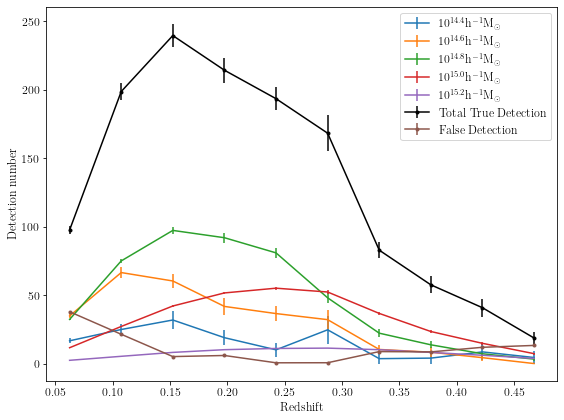

In [ ]:
import matplotlib.pyplot as plt
total_expectation_num = np.zeros(10)
total_std = np.zeros(10)
for i in range(5):
    total_expectation_num = total_expectation_num + halo_density_array[i]*detection_rate_mean[i]
    total_std = total_std + (halo_density_array[i]*detection_rate_std[i])**2
    plt.errorbar(input_redshift, halo_density_array[i]*detection_rate_mean[i], yerr = halo_density_array[i] * detection_rate_std[i],label = r'$10^{{{}}} \rm{{h^{{-1}}M_{{\odot}}}}$'.format(true_log_mass[i]))
plt.errorbar(input_redshift,total_expectation_num, yerr = np.sqrt(total_std), fmt='-o', markersize=3, label='Total True Detection',c='black')
plt.errorbar(input_redshift,weighted_false_detection_rate_mean,yerr =weighted_false_detection_rate_std ,fmt='-o' ,label='False Detection', markersize=3)
plt.legend()
plt.ylabel(r'Detection number')
plt.xlabel(r'Redshift')
plt.tight_layout()
plt.savefig('PaperPlots/Total Detection Number versus Redshift COMBINED.pdf')
plt.show()

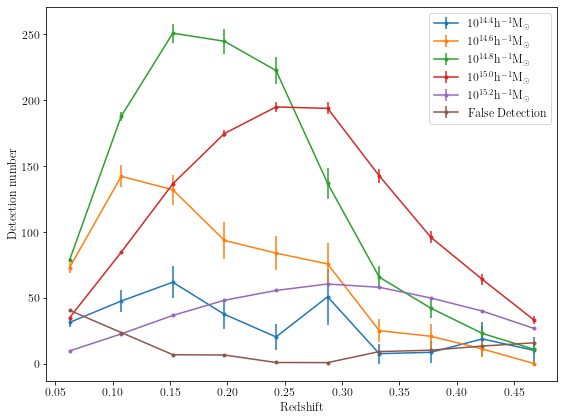

In [ ]:
total_expectation_num = np.zeros(10)
total_std = np.zeros(10)
for i in range(5):
    # total_expectation_num = total_expectation_num + halo_density_array[i]*detection_rate_mean[i]
    # total_std = total_std + (halo_density_array[i]*detection_rate_std[i])**2
    plt.errorbar(input_redshift, halo_density_array[i]*detection_rate_mean[i], yerr = halo_density_array[i] * detection_rate_std[i],label = r'$10^{{{}}} \rm{{h^{{-1}}M_{{\odot}}}}$'.format(true_log_mass[i]),fmt='-o', markersize=3)
#plt.errorbar(input_redshift,total_expectation_num, yerr = np.sqrt(total_std), fmt='-o', markersize=3, label='True Detection')
plt.errorbar(input_redshift,weighted_false_detection_rate_mean,yerr =weighted_false_detection_rate_std ,fmt='-o' ,label='False Detection', markersize=3)
plt.legend()
plt.ylabel(r'Detection number')
plt.xlabel(r'Redshift')
plt.tight_layout()
plt.savefig('PaperPlots/Detection Number versus Redshift.pdf')
plt.show()

Below is an old version that uses Dask instead of panda

In [ ]:
ddf_successful_list = [ddf[ddf.successful_reconstruction] for ddf in ddf_list] 

In [ ]:
for i in range(len(ddf_list)):
    ddf_list[i] = ddf_list[i].assign(false_reconstruction=lambda x: (1-x["successful_reconstruction"])).compute()

In [ ]:
all_group_by_z_list = [ddf.groupby(['input_z','halo_id']) for ddf in ddf_list]
all_group_by_reconz_list = [ddf.groupby(['reconstructed_z','halo_id']) for ddf in ddf_list]

In [ ]:
group_by_z_list = [ddf.groupby(['input_z','halo_id']) for ddf in ddf_successful_list]

In [ ]:
averaged_detectionrate = [all_group_by_z.successful_reconstruction.sum()/10 for all_group_by_z in all_group_by_z_list]

In [ ]:
averaged_detectionrate[1]

input_z  halo_id
0        0          0.4
         1          0.5
         2          0.1
         3          0.3
         4          0.3
                   ... 
7        93         0.1
8        44         0.1
         45         0.0
         57         0.1
         95         0.1
Name: successful_reconstruction, Length: 398, dtype: float64

In [ ]:
false_detection_number = [all_group_by_reconz.false_reconstruction.sum()/10000 for all_group_by_reconz in all_group_by_reconz_list]


In [ ]:
false_detection_number[1]

reconstructed_z  halo_id
0                0          0.0000
                 1          0.0000
                 2          0.0000
                 3          0.0000
                 4          0.0000
                             ...  
9                77         0.0001
                 83         0.0001
                 89         0.0001
                 92         0.0000
                 95         0.0000
Name: false_reconstruction, Length: 424, dtype: float64

In [ ]:
false_detection_rate = np.zeros((5,10,100))

In [ ]:
for i in range(5):
    for j in range(10):
        for k in range(100):
            try: 
                false_detection_rate[i,j,k] = false_detection_number[i][j][k]
            except:
                false_detection_rate[i,j,k] = 0

In [ ]:
detection_rate = np.zeros((5,10,100),dtype = np.float64)

In [ ]:
for i in range(5):
    for j in range(10):
        for k in range(100):
            try: 
                detection_rate[i,j,k] = averaged_detectionrate[i][j][k]
            except:
                detection_rate[i,j,k] = 0

In [ ]:
detection_rate_std = np.zeros((5,10))
detection_rate_mean = np.zeros((5,10))
for i in range(5):
    for j in range(10):
        detection_rate_std[i,j] = np.std(detection_rate[i,j])/(np.sqrt(100))
        detection_rate_mean[i,j] = np.mean(detection_rate[i,j])
false_detection_rate_std = np.zeros((5,10))
false_detection_rate_mean = np.zeros((5,10))
for i in range(5):
    for j in range(10):
        false_detection_rate_std[i,j] = np.std(false_detection_rate[i,j])/(np.sqrt(10000))
        false_detection_rate_mean[i,j] = np.sum(false_detection_rate[i,j])

In [29]:
from astropy.io import fits
file1_fits = fits.open('sep27_nfw146lbd4_noiseless.fits')
file1 = file1_fits[1].data
input_redshift = np.array(file1['input_redshift'])[:,0]
input_redshift

array([0.0625, 0.1075, 0.1525, 0.1975, 0.2425, 0.2875, 0.3325, 0.3775,
       0.4225, 0.4675], dtype=float32)

In [27]:
import pyccl as ccl
def halo_density(log_m):
    h = 67.4/100
    Omega_c = 0.12/h**2
    Omega_b = 0.0224/h**2
    cosmo = ccl.Cosmology(Omega_c=Omega_c, Omega_b=Omega_b,
                          h=0.674, sigma8=0.811, n_s=0.965, Neff=2.99) #placnk 2018
    M_vir = 10 ** log_m
    conc = 4
    hmfunc = []
    for z in input_redshift:
        halo1    =  hmod.triaxialJS02(mass=M_vir,conc=conc,redshift=z,ra=0.,dec=0,a_over_c=1,a_over_b=1, tri_nfw = False, long_truncation = True, OLS03 = True) #33,16
        hmd = ccl.halos.MassDef(halo1.Omega_z*halo1.Delta_vir, 'critical')
        hmf = ccl.halos.MassFuncTinker10(cosmo, mass_def = hmd) # boquet16 is "not compatible"
        a = 1 / (1 + z-0.0225)
        a2 = 1/(1+z+0.0225)
        dlogm = 0.2
        volume = 4/3*np.pi*ccl.comoving_radial_distance(cosmo, a2)**3 - 4/3*np.pi*ccl.comoving_radial_distance(cosmo, a)**3
        this_hmf = hmf.get_mass_function(cosmo, M_vir/0.674, a)*volume*dlogm 
        #/(4*np.pi*((180/np.pi))**2). This would convert to per degree^2
        hmfunc.append(this_hmf)
        #print(z)
    return hmfunc


In [30]:
halo_density_array = np.zeros((5,10))
for i in range(5):
    halo_density_array[i] = halo_density(true_log_mass[i])

In [31]:
halo_density_array[4]

array([ 2.33613716,  5.25676779,  7.98293795,  9.94324825, 10.96118679,
       11.08496133, 10.49133957,  9.41014694,  8.06728366,  6.65066419])

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
font = {'size'   : 14, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
matplotlib.mathtext.rcParams['legend.fontsize']='medium'
plt.rcParams["figure.figsize"] = [8.0,6.0]
matplotlib.rc('font',**{'family':'serif','serif':['Times New Roman']})
matplotlib.rc('text', usetex=True)

In [ ]:
false_detection_full_sky = np.zeros(10)
false_detection_rate_full_sky = np.zeros(10)
for i in range(10):
    false_detection_full_sky[i] = false_detection_rate_mean[0][i]*(4*np.pi*((180/np.pi))**2)/(1.6**2)
    false_detection_rate_full_sky[i] = false_detection_rate_std[0][i]*(4*np.pi*((180/np.pi))**2)/(1.6**2)

In [ ]:
false_detection_full_sky

array([29.00598838, 17.72588179,  3.2228876 , 11.28010659,  0.        ,
        1.6114438 , 12.89155039,  3.2228876 ,  6.4457752 ,  6.4457752 ])

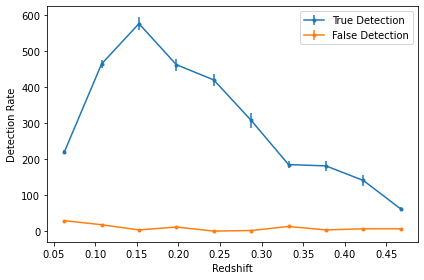

In [ ]:
import matplotlib.pyplot as plt
total_expectation_num = np.zeros(10)
total_std = np.zeros(10)
for i in range(5):
    total_expectation_num = total_expectation_num + halo_density_array[i]*detection_rate_mean[i]
    total_std = total_std + (halo_density_array[i]*detection_rate_std[i])**2
    #plt.errorbar(input_redshift, halo_density_array[i]*detection_rate_mean[i], yerr = halo_density_array[i] * detection_rate_std[i],label = r'$10^{{{}}} \rm{{h^{{-1}}M_{{\odot}}}}$'.format(true_log_mass[i]))
plt.errorbar(input_redshift,total_expectation_num, yerr = np.sqrt(total_std), fmt='-o', markersize=3, label='True Detection')
plt.errorbar(input_redshift,false_detection_full_sky,yerr =false_detection_rate_full_sky ,fmt='-o' ,label='False Detection', markersize=3)
plt.legend()
plt.ylabel(r'Detection Rate')
plt.xlabel(r'Redshift')
plt.tight_layout()
#plt.savefig('Detection Rate versus Redshift.pdf')
plt.show()

In [ ]:
np.sum(total_expectation_num)/((4*np.pi*((180/np.pi))**2))

0.0731660319530422

In [ ]:
np.sum(false_detection_full_sky)/((4*np.pi*((180/np.pi))**2))

0.0022265624999999994

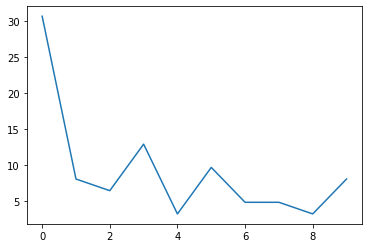

In [ ]:
plt.plot(false_detection_full_sky)

In [ ]:
ddf_list[3]

,reconstructed_z,reconstructed_x,reconstructed_y,reconstructed_log10m,input_z,input_a_over_c,successful_reconstruction,frame_counter,halo_id,false_reconstruction
0,0,24,24,15.024192,0,0,True,1,0,0
0,1,24,25,15.018621,0,0,True,1,1,0
0,1,23,24,15.022034,0,0,True,1,10,0
0,1,23,23,14.974243,0,0,True,1,11,0
0,1,24,24,15.132574,0,0,True,1,12,0


In [ ]:
ddf_false_list = [ddf[ddf.false_reconstruction==1] for ddf in ddf_list]

In [ ]:
false_detected_mass = 10**(np.array(ddf_false_list[0]["reconstructed_log10m"]))

In [ ]:
false_detected_mass

array([8.95801065e+14, 3.87811682e+14, 3.86862589e+14, 8.83042227e+14,
       6.79794457e+14, 5.45057130e+14, 7.96163315e+14, 4.65564162e+14,
       8.99993705e+14, 3.94273182e+14, 4.08408868e+14, 4.31816691e+14,
       3.92733409e+14, 5.60625020e+14, 7.54839727e+14, 5.90591715e+14,
       8.24168221e+14, 5.65373801e+14, 7.27479685e+14, 6.30181790e+14,
       6.67008227e+14, 4.28622991e+14, 3.84150679e+14, 3.84756676e+14,
       5.24408471e+14, 8.20396774e+14, 4.01111597e+14, 7.05427107e+14,
       7.97097130e+14, 4.04864460e+14, 1.04974303e+15, 6.69737323e+14,
       9.16790246e+14, 3.76119763e+14, 7.25538687e+14, 3.86677929e+14,
       4.02923313e+14, 4.02940879e+14, 9.44049912e+14, 3.87185162e+14,
       4.44965897e+14, 4.11970804e+14, 4.07447490e+14, 4.30378573e+14,
       4.49869373e+14, 5.11645682e+14, 0.00000000e+00, 4.33748607e+14,
       4.33261662e+14, 3.76421741e+14, 4.10997270e+14, 0.00000000e+00,
       4.12418570e+14, 0.00000000e+00, 7.16865241e+14, 4.11339034e+14,
      

(array([ 4.,  0.,  0., 20., 10.,  4.,  8.,  5.,  5.,  1.]),
 array([0.00000000e+00, 1.04974303e+14, 2.09948606e+14, 3.14922909e+14,
        4.19897212e+14, 5.24871515e+14, 6.29845818e+14, 7.34820121e+14,
        8.39794424e+14, 9.44768727e+14, 1.04974303e+15]),
 <BarContainer object of 10 artists>)

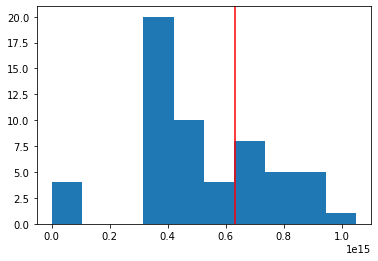

In [ ]:
plt.axvline(x=10**14.8,color="red")
plt.hist(false_detected_mass)

(array([ 7.,  4., 12.,  0., 11.,  1.,  6.,  6.,  6.,  4.]),
 array([-8. , -6.3, -4.6, -2.9, -1.2,  0.5,  2.2,  3.9,  5.6,  7.3,  9. ]),
 <BarContainer object of 10 artists>)

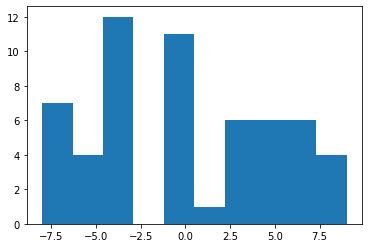

In [ ]:
#14.4->15.2
plt.hist(np.array(ddf_false_list[0]["reconstructed_z"]-ddf_false_list[0]["input_z"]))

In [ ]:
ddf146.groupby(["input_z"]).reconstructed_z.head()

Dask Series Structure:
npartitions=1
    int64
      ...
Name: reconstructed_z, dtype: int64
Dask Name: series-groupby-head-agg, 21431 tasks